# **Extra 1**

## Introduction

The purpose of this notebook is to discuss the Bitcoin and S&P500 data that is being worked with in some of the chapters and its nuances. As such, it will be presented some of the problems I've encontered and solutions I choose. I am not an expert by no means in any of this analysis, although I've put a little effort on my research and have used a little bit of common sense in my analysis. I don't expect this data to in perfect sync with future events neither any kind of confirmation from "my predictions".

## Why S&P 500? Why Bitcoin?

Stock markets are a valuable source of data, since the market movements are in direct relationship with the human action and some of its tendencies, ranging from the preference for a product over another to the emergence of a unique business opportunity. This aspect will be more revealing the more we deepen ourselves in the data itself.
Now, I choose the S&P500 because of its stability and the variety of areas the index covers, but mainly because its value is based on the 500 largest companies. This characteristics allow me to understand the behaviour of low-risk investors. Will they buy Bitcoin (a store of value) when the stock market is falling apart? Perhaps they will sell it? Maybe there are no relationship between those variables. The data analysis will help to provide the answer, but here (again) we will discuss the problems of making that correlation and how to work with that.  

## The History of prices (Plotting the Graph)

In [111]:
from typing import List
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import statistics
import random
import math

In [146]:
f = open('../data/btc_s&p.csv', 'r', encoding='utf-8')
data = pd.read_csv(f, index_col=False, parse_dates=['DATE'])
data.head(31)

,DATE,CBBTCUSD,SP500
0,2015-01-01,288.990,2058.2000
1,2015-01-02,288.990,2058.2000
2,2015-01-05,288.990,2020.5800
3,2015-01-06,288.990,2002.6100
4,2015-01-07,288.990,2025.9000
5,2015-01-08,288.990,2062.1400
6,2015-01-09,283.192,2044.8100
7,2015-01-12,265.798,2028.2600
8,2015-01-13,260.000,2023.0300
9,2015-01-14,120.000,2011.2700


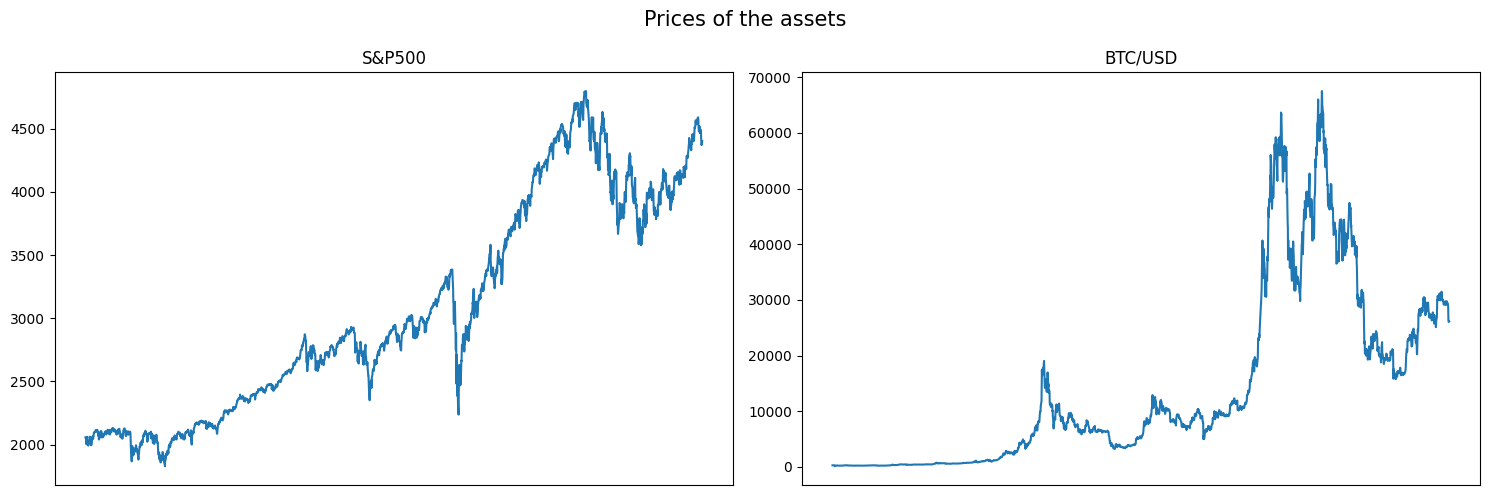

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), tight_layout=True)
fig.suptitle("Prices of the assets", fontsize=15)
ax[0].plot(data['DATE'], data['SP500'])
ax[0].set_title("S&P500")
ax[0].set_xticks([])

ax[1].plot(data['DATE'], data['CBBTCUSD'])
ax[1].set_title("BTC/USD")
ax[1].set_xticks([])
plt.show()

As you can see, in the big picture both have weird brusque ups and downs, so we can't really work with any kind of analysis from there. So the strategy I opt to use is to select 30 days sized microepochs in which we have more stability compared to the general tendency of the overall period (from both of them) and pick all the samples. The steps for that should look like this: 

1. Iterate over all the period with day by day with one month size;
2. Select all the periods that have the least extreme linear AROCs;
3. Discard the periods that are not the same for both of the graphs;
4. Discard overlapping periods.

In [251]:
def aroc(df: pd.DataFrame) -> List:
    """Calculates the linear Average Rate of Change of Sample"""
    period = f"{df.iloc[0, 0]} - {df.iloc[-1, 0]}"
    aroc = (df.iloc[-1, 1:] - df.iloc[0, 1:]) / df.iloc[0, 1:]
    return (period, *aroc)


def select_periods(df: pd.DataFrame, size: int = 30) -> List[pd.DataFrame]:
    """Produces and selects the periods that have the least extreme linear AROCS"""
    samples = []
    for i in range(len(df) - size):
        window = df.iloc[i : i + size]
        s = pd.DataFrame([window.iloc[0], window.iloc[-1]])
        samples.append(s)
    s_aroc = []
    for s in samples:
        s_aroc.append(aroc(s))
    return s_aroc


select_periods(data)[0]

('2015-01-01 00:00:00 - 2015-02-11 00:00:00',
 -0.23938544586317867,
 0.005018948595860647)